<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/25_3_Evaluating_Clusters_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. 
Assess the consistency of the solutions using visualization. Which one does seem to be the best one?



Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

X = heart.iloc[:-1, :13] y = heart.iloc[:-1, 13]

In [0]:
import numpy as np
import pandas as pd
import scipy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from collections import Counter

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
hd0 = pd.read_sql_query('select * FROM heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [0]:
heart=hd0.copy()

In [0]:
#heart.head()

heart = heart[:-1]

In [0]:
list(heart)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']

  **HERE IS THE MISSING PART**

In [0]:
# Make sure the number of rows divides evenly into four samples.
rows = heart.shape[0] - heart.shape[0] % 2
df = heart.iloc[:rows, :]

In [0]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]


# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [0]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [0]:
X_half1.shape

(151, 13)

In [0]:
X_half2.shape

(151, 13)

In [0]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

In [0]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):


   
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

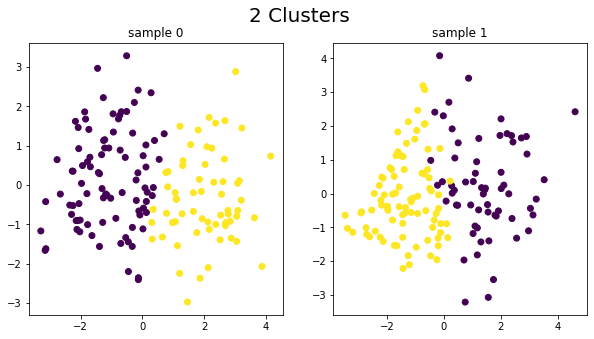

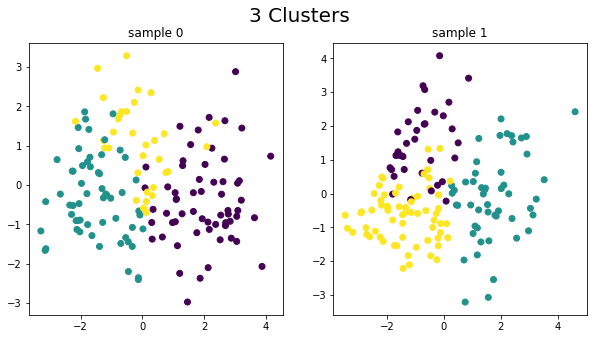

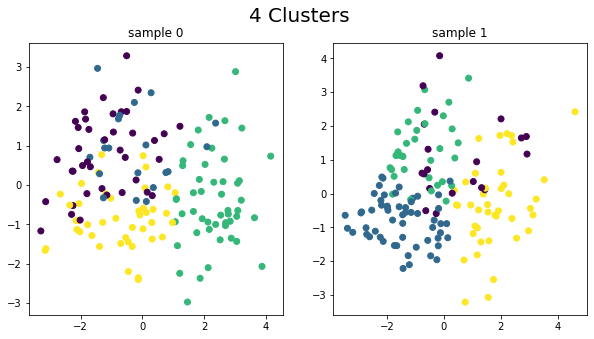

In [94]:
plt.rcParams["figure.figsize"] = [10,5]

for cluster in range(2,5):
      # Make a grid of subplots.
    f, axarr = plt.subplots(1,2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    #plt.tight_layout()
    plt.show()
    print('\n')

##**ARI SCORE**

In [0]:
from sklearn.metrics.cluster import adjusted_rand_score

In [107]:
full_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1
row_0,,
0,101,38
1,13,150


In [108]:
adjusted_rand_score(y,full_pred)

0.43661540614807665

////////////////////////////////////////////////////////////////////

In [109]:
full_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,34,95,10
1,88,10,65


In [110]:
adjusted_rand_score(y,full_pred)

0.280694132678885

In [111]:
full_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2,3
row_0,,,,
0,79,30,21,9
1,10,74,21,58


In [112]:
adjusted_rand_score(y,full_pred)

0.19162596502170298

##**SILHOUETTE COEFFICIENT**

In [113]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.17440650461256255


In [114]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.12862190702187828


In [116]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.1314736248593191
